In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix,classification_report

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,LSTM,Dense,GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam

## Data

In [2]:
mnist_data = tf.keras.datasets.mnist

(X_train,y_train),(X_test,y_test) = mnist_data.load_data()

11493376/11490434 [==============================] - 0s 0us/step


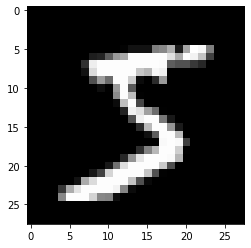

In [3]:
plt.imshow(X_train[0],cmap='gray')

In [4]:
print(f'Shape of X_train: {X_train.shape}, Shape of y_train: {y_train.shape}')
print(f'Shape of X_train: {X_test.shape}, Shape of y_train: {y_test.shape}')
T,D = X_train[0].shape

Shape of X_train: (60000, 28, 28), Shape of y_train: (60000,)
Shape of X_train: (10000, 28, 28), Shape of y_train: (10000,)


In [0]:
X_train, X_test = X_train/255.0, X_test/255.0

## LSTM Model

In [0]:
i = Input(shape=(T,D))
x = LSTM(128)(i)
x = Dense(10,activation='softmax')(x)

model = Model(i,x)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [7]:
model.fit(X_train,y_train,epochs=10,
          validation_data=(X_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.3291 - accuracy: 0.8948 - val_loss: 0.1415 - val_accuracy: 0.9574
Epoch 2/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.1052 - accuracy: 0.9691 - val_loss: 0.0933 - val_accuracy: 0.9706
Epoch 3/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0752 - accuracy: 0.9767 - val_loss: 0.0740 - val_accuracy: 0.9772
Epoch 4/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0568 - accuracy: 0.9825 - val_loss: 0.0767 - val_accuracy: 0.9759
Epoch 5/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0456 - accuracy: 0.9857 - val_loss: 0.0543 - val_accuracy: 0.9843
Epoch 6/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0386 - accuracy: 0.9879 - val_loss: 0.0644 - val_accuracy: 0.9808
Epoch 7/10
1875/1875 [==============================] - 50s 26ms/step - loss: 0.0338 - accuracy: 0.9899 - val_loss: 0.0553 -

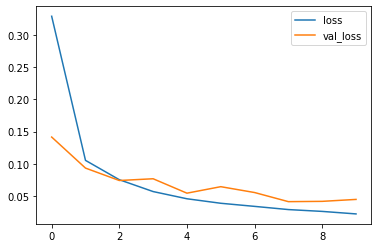

In [8]:
losses = pd.DataFrame(model.history.history)
plt.plot(losses['loss'],label='loss')
plt.plot(losses['val_loss'],label='val_loss')
plt.legend()
plt.show()

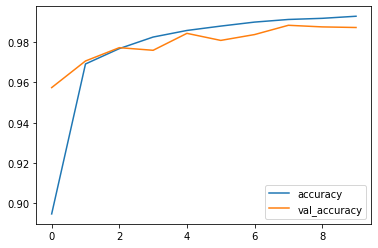

In [9]:
plt.plot(losses['accuracy'],label='accuracy')
plt.plot(losses['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

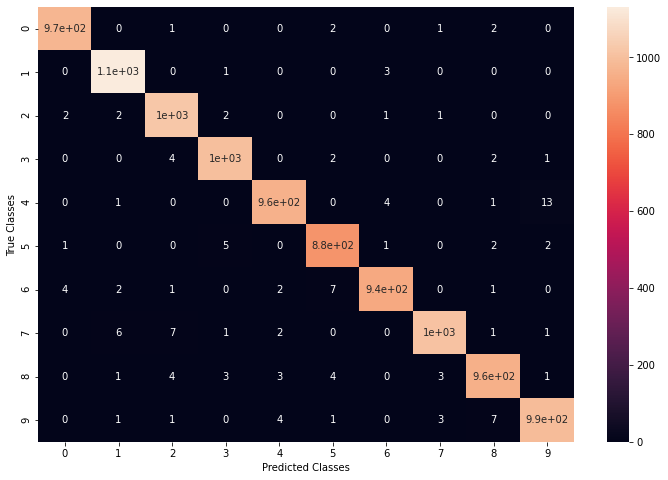

In [29]:
pred = model.predict(X_test).argmax(axis=1)
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test,pred),annot=True)
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.show()

In [32]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98      0.98       982
           5       0.98      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



## LSTM with MaxPooling

In [0]:
i = Input(shape=(T,D))
x = LSTM(128,return_sequences=True)(i)
x = GlobalMaxPooling1D()(x)
x = Dense(10,activation='softmax')(x)

model = Model(i,x)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [33]:
model.fit(X_train,y_train,epochs=10,
          validation_data=(X_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.3747 - accuracy: 0.8880 - val_loss: 0.1242 - val_accuracy: 0.9650
Epoch 2/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.1074 - accuracy: 0.9688 - val_loss: 0.0778 - val_accuracy: 0.9784
Epoch 3/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0705 - accuracy: 0.9787 - val_loss: 0.0567 - val_accuracy: 0.9829
Epoch 4/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0559 - accuracy: 0.9830 - val_loss: 0.0492 - val_accuracy: 0.9849
Epoch 5/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0445 - accuracy: 0.9867 - val_loss: 0.0440 - val_accuracy: 0.9866
Epoch 6/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0365 - accuracy: 0.9888 - val_loss: 0.0441 - val_accuracy: 0.9869
Epoch 7/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0318 - accuracy: 0.9905 - val_loss: 0.0407 -

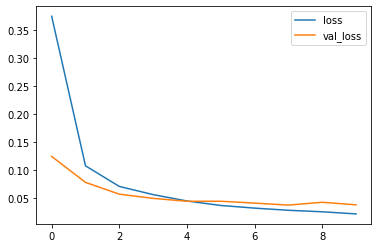

In [34]:
losses = pd.DataFrame(model.history.history)
plt.plot(losses['loss'],label='loss')
plt.plot(losses['val_loss'],label='val_loss')
plt.legend()
plt.show()

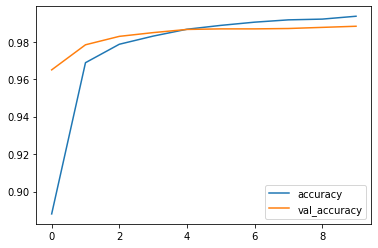

In [35]:
plt.plot(losses['accuracy'],label='accuracy')
plt.plot(losses['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

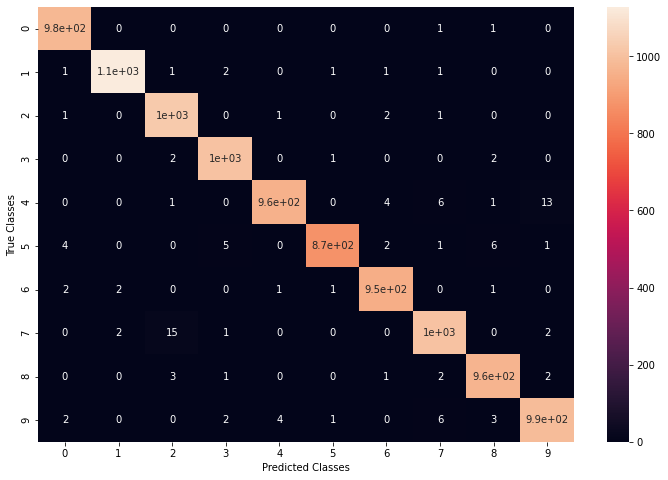

In [36]:
pred = model.predict(X_test).argmax(axis=1)
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test,pred),annot=True)
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.show()

In [37]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.98      1.00      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.97      0.98       982
           5       1.00      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

